# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [4]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [5]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 100., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

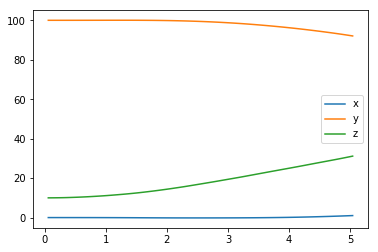

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

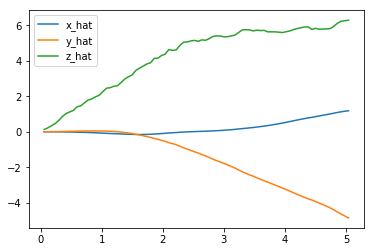

In [7]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

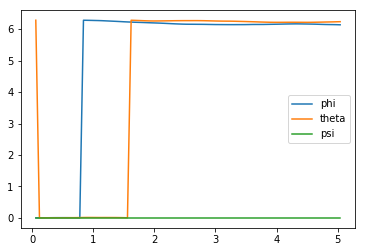

In [8]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

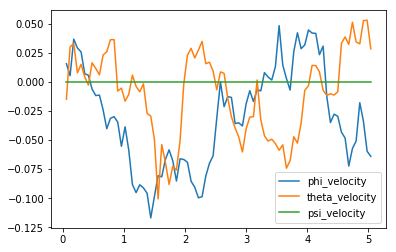

In [9]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

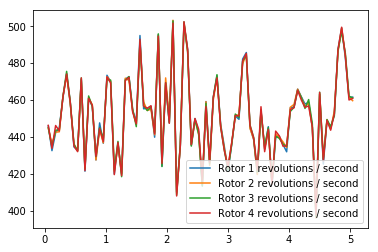

In [10]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 1.0131101  92.07197725 31.14701972  6.13831953  6.23711373  0.        ]
[ 1.18558515 -4.86086075  6.28871803]
[-0.06399698  0.02853805  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.094 (best =   0.328), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

1- To familiarize my self with the project I tried to replicate one experment in the SRC section below and the below code

In [11]:
# import time
# import gym
# from task_mountain_car import TaskMountainCar
# from agents.agent import DDPG

# task = TaskMountainCar(gym.make('MountainCarContinuous-v0'))

# agent = DDPG(task)
# rewards = []
# for i_episode in range(1, 10):
#     state = agent.reset_episode() # start a new episode
#     while True:
#         action = agent.act(state)
#         next_state, reward, done = task.step(action)
#         agent.step(action, reward, next_state, done)
#         state = next_state
#         if done:
#             rewards.append(reward)
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
#                 i_episode, agent.score, agent.best_score), end="")  # [debug]
#             rewards.append(reward)
#             break            
#     sys.stdout.flush()

SRC: https://curiouscoder.space/blog/deep%20learning/teaching-a-quadcopter-to-take-off-ddpg/

2- I followed instruction in udacity to construct my agent with the defult parameter settings and teach it how to fly

Agent: DDPG

Task: TaskMountainCar my version not the above in the blog

In [15]:
import time
import gym
from agents.agent import Basic_Agent
from agents.agent import DDPG
from task_mountain_car import TaskMountainCar

task = TaskMountainCar(gym.make('MountainCarContinuous-v0')  )

agent = DDPG(task)
agent_rewards = []
for i_episode in range(1, 1001):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            agent_rewards.append(reward)
            break            
    sys.stdout.flush()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode = 1000, score =  83.867 (best =  97.199)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

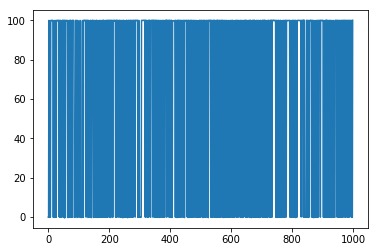

In [16]:
## TODO: Plot the rewards.
plt.plot( agent_rewards , label='Rewards / Episode')

3- I created my own agent using lanarlader which teach the agent how to land

Agent: Basic_Agent 

Task:TaskLander

In [22]:
import time
import gym
from agents.agent import Basic_Agent
from agents.agent import DDPG
from task_lander import TaskLander
import sys
task = TaskLander(gym.make('LunarLander-v2')  )

agent = Basic_Agent(task)
agent_rewards = []
for i_episode in range(1, 1001):
    state = agent.reset() # start a new episode
    while True:        
        action = agent.act(state)
        
        next_state, reward, done = agent.step(action)
        
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            agent_rewards.append(reward)
            break            
    sys.stdout.flush()

Episode = 1000, score = 258.178 (best = 322.774))

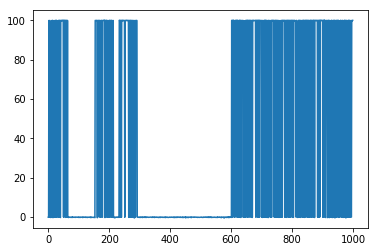

In [14]:
## TODO: Plot the rewards.
plt.plot(agent_rewards , label='Rewards / Episode')

4- I created my own agent using lanarlader which teach the agent how to land

Agent: DDPG_Land 

Task:TaskLanderWithPhy

In [24]:
import time
import gym
# from agents.agent import Basic_Agent
from agents.agent_DDPG import DDPG_Land
from task_lander_with_phy import TaskLanderWithPhy
import sys

task = TaskLanderWithPhy(gym.make('LunarLander-v2')  )

agent = DDPG_Land(task)
agent_rewards = []
for i_episode in range(1, 41):
    state = agent.reset() # start a new episode
    while True:        
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            agent_rewards.append(reward)
            break            
    sys.stdout.flush()

Episode =   40, score = 100.000 (best = 664.556)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

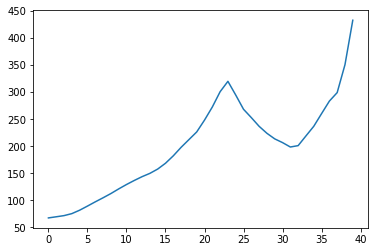

In [26]:
## TODO: Plot the rewards.
plt.plot(agent_rewards)

In [71]:
%load_ext autoreload
%autoreload 2

from agents.agent_DDPG import DDPG_Land
from task_lander_with_phy import TaskLanderWithPhy

# Land
target_pose =np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
init_pose =np.array([0.0, 0.0, 100.0, 0.0, 0.0, 0.0])

task = TaskLanderWithPhy(gym.make('LunarLander-v2'), init_pose=init_pose, 
            init_velocities=np.array([100.0, 10.0, 40.0]), 
            init_angle_velocities=np.array([20.0, 40.0, 50.0]),
            runtime=5., 
            target_pos=target_pose)
agent = DDPG_Land(task) 


# Actor
# Hidden layers activation function: relu
# Output layer activation function: sigmoid
print(agent.actor_local.model.summary())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 24)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 32)                800       
_________________________________________________________________
dense_128 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_129 (Dense)            (None, 32)                2080      
_________________________________________________________________
raw_actions (Dense)          (None, 40)                1320      
_________________________________________________________________
actions (Lambda)             (None, 40)                0         
Total params: 6,312
Trainable params: 6,312
Non-traina

In [72]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

file_output = 'data_ddpg.csv'                         # file name for saved results

# Setup
# task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
# agent = Basic_Agent(task)
# done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
num_episodes = 30

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset()
    for i in range(num_episodes):
        while True:
            rotor_speeds = agent.act(state)
            _, _, done = task.step(rotor_speeds)
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


** Position Evolution over time **

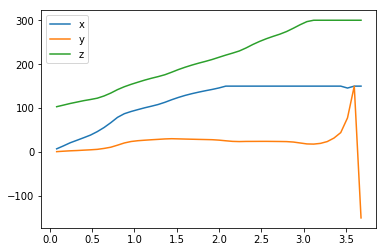

In [73]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

**  velocity of the quadcopter. **

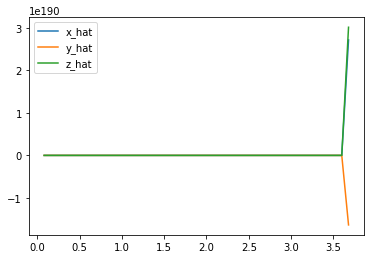

In [74]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

** the rotation of the quadcopter over x,y,and z axes **

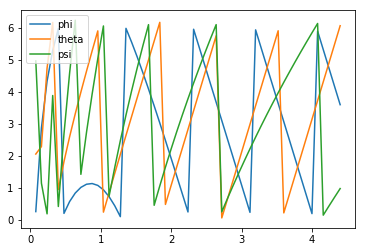

In [75]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

** velocities (in radians per second) corresponding to each of the Euler angles.  **

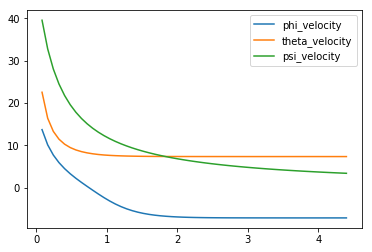

In [76]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

** agent actions **

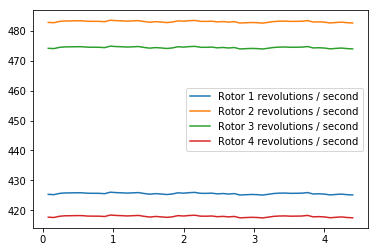

In [77]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

** Actor Crtic settings **

In [78]:
%load_ext autoreload
%autoreload 2


# Actor
# Hidden layers activation function: relu
# Output layer activation function: sigmoid
print(agent.actor_local.model.summary())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 24)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 32)                800       
_________________________________________________________________
dense_128 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_129 (Dense)            (None, 32)                2080      
_________________________________________________________________
raw_actions (Dense)          (None, 40)                1320      
_________________________________________________________________
actions (Lambda)             (None, 40)                0         
Total params: 6,312
Trainable params: 6,312
Non-traina

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

How did you design the reward function?

For the reward function in LunarLander ## reward = 1.3*(abs(self.sim.v[2])).sum() ## my implementation is in task_lander_with_phy.py It did will at the beginning of 40 Episods then it losses its stability and get nan score( I tried to fix the issue by using cliping but the problem remian the same).

The agent expected to get high score when the velocity is low. Please find the above implementation and visualization.

How do you think, the mentioned reward function can be used to achieve the task.

It will give posative reward for negative location and I choose it as contrary to MountainCarContinuous which is the same reward function multiplied with -1 .

Did you try any other reward function?

No. But my plan to focus on getting the deep learning nano degree in the summer to understan RL better.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

For the implementation, I used the learner from DDPG paper which is gived in Udacity.

### Score tracker and learning parameters
        self.score = -np.inf
        self.best_w = None
        self.best_score = -np.inf
        self.noise_scale = 0.1
        
        #counter
        self.count = 0

        # Replay memory
        self.buffer_size = 100000
        self.batch_size = 64
        self.memory = ReplayBuffer(self.buffer_size, self.batch_size)
        
        # Noise process
        self.exploration_mu = 0
        self.exploration_theta = 0.15
        self.exploration_sigma = 0.2
        self.noise = OUNoise(1, self.exploration_mu, self.exploration_theta, self.exploration_sigma)
        
        
        # Algorithm parameters
        self.gamma = 0.99  # discount factor
        self.tau = 0.01  # for soft update of target parameters

How did you design the currently used model architecture?

*I used two modular from AI Gym on called LunarLander to teach the quadcoper how to land and MountainCarContinuous tp teach it how to fly*

How did you come up with the used values of hyperparameters and why do you they are a good choice for this task.

*The settings are the default but I spent some time reading DDPG paper to understand the settings. *

To what extent, do you think the choice of hyperparameters impacts the performance of the agent.

*AS it has been stated in DDPG paper, setting them too high or too low will impact the agent learning. A place between exploration and exploitation should be maintained to avoid performance deterioration*

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

My two implementation seems to fail to learn compared to the agent design from SRC blog mentioned above.

The agent did not successfully learn the tasks but we might improve it by fixing the reward function in the future and better tune the hyperparameters.

I tried the following:

1- followed the architicture discussed in SRC and replicate the experiments, my agent leared fast.*parameters the ninth setting in DDPG paper*

2- replicate the same experiments with the hyperparameters mentioned but my agent did not sucessfully learn the task.

3- hacked the code and implement my basic agent to teach quadcoper how to land with low but it got learning score.

4- tried to enhanced my experiments by using DDPG with the buffer reply and actor critic but could not sucessfuly choose the correct reward function nor fixing the score bug.

** Actor Critic **

The Actor Critic model is a better score function. Instead of waiting until the end of the episode as we do in Monte Carlo REINFORCE, we make an update at each step (TD Learning).

** Buffer replay **

Buffer replay is a key technique that allow the agent to learn from earlier memories which can speed up learning and break undesirable temporal correlations.. Too much or too little memory both slow down learning.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

The hardest part is to understand the requirments for the task and hack the code to get it done, understand and intrepret the result, and time to set and watch the video to know where to start.

Using Gym AI is the most intresting part and I will dedecate more time to learn it better.

In [69]:
# import sys
# import pandas as pd
# from agents.agent import DDPG
# from task import Task

# num_episodes = 1000
# target_pos = np.array([10., 10., 10.])
# task = Task(gym.make('LunarLander-v2'))
# agent = DDPG(task) 

# for i_episode in range(1, num_episodes+1):
#     state = agent.reset_episode() # start a new episode
#     while True:
#         action = agent.act(state) 
#         next_state, reward, done = task.step(action)
#         agent.step(reward, done)
#         state = next_state
#         if done:
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
#                 i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
#             break
#     sys.stdout.flush()

In [70]:
# #!/usr/bin/env python
# from __future__ import print_function

# import sys, gym, time


# env = gym.make('LunarLander-v2')

# # if not hasattr(env.action_space, 'n'):
# #     raise Exception('Keyboard agent only supports discrete action spaces')
# # ACTIONS = env.action_space.n
# SKIP_CONTROL = 0    # Use previous control decision SKIP_CONTROL times, that's how you
# #                     # can test what skip is still usable.

# human_agent_action = 0
# human_wants_restart = False
# human_sets_pause = False

# # def key_press(key, mod):
# #     global human_agent_action, human_wants_restart, human_sets_pause
# #     if key==0xff0d: human_wants_restart = True
# #     if key==32: human_sets_pause = not human_sets_pause
# #     a = int( key - ord('0') )
# #     if a <= 0 or a >= ACTIONS: return
# #     human_agent_action = a

# # def key_release(key, mod):
# #     global human_agent_action
# #     a = int( key - ord('0') )
# #     if a <= 0 or a >= ACTIONS: return
# #     if human_agent_action == a:
# #         human_agent_action = 0

# env.render()
# # env.unwrapped.viewer.window.on_key_press = key_press
# # env.unwrapped.viewer.window.on_key_release = key_release

# def rollout(env):
#     global human_agent_action, human_wants_restart, human_sets_pause
#     human_wants_restart = False
#     obser = env.reset()
#     skip = 0
#     total_reward = 0
#     total_timesteps = 0
#     while 1:
#         if not skip:
#             #print("taking action {}".format(human_agent_action))
#             a = human_agent_action
#             total_timesteps += 1
#             skip = SKIP_CONTROL
#         else:
#             skip -= 1

#         obser, r, done, info = env.step(a)
#         if r != 0:
#             print("reward %0.3f" % r)
#         total_reward += r
#         window_still_open = env.render()
#         if window_still_open==False: return False
#         if done: break
#         if human_wants_restart: break
#         while human_sets_pause:
#             env.render()
#             time.sleep(0.1)
#         time.sleep(0.1)
#     print("timesteps %i reward %0.2f" % (total_timesteps, total_reward))

# # print("ACTIONS={}".format(ACTIONS))
# # print("Press keys 1 2 3 ... to take actions 1 2 3 ...")
# # print("No keys pressed is taking action 0")

# while 1:
#     window_still_open = rollout(env)
#     if window_still_open==False: break